# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs
import numpy as np

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The smartcab is stationary throughout the simulation. Th driving grid updates the positions of all the cars, and text above the driving grid informs me on what action I have taken (none), the corresponding reward, and an explanation on why this rewad was given; for example, being stationary at a red light gives me a positive reward (printed in green color to stress the positivity), while being stationary at a green light gives me a negative reward (printed in red color to stress the negativity). The cab also gets a positive reward for not moving at a green light when there is traffic. I also see a Udacity sign on the board, which is presumably the goal the smartcab is meant to reach.

I notice that the magnitude of the negative rewards for waiting at a green light are considerably larger than the magnitude of the positive rewards for waiting at red light. This could have to do with a constant, negative reward beign given to each time-step spent on the road.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

 - When creating the environment object, we can set the flag `num_dummies` to any integer we like, in this way changing the number of other cars on the road. When we use the function `set_primary_agent` to create the taxicab and place it as the protagonist we will learn with, we may choose to set the flag `enforce_deadline` to `True`. This will place a time contraint on reaching our destination; once the time has run out, we will commence a new trial, which states whether the previous trial was a success of failure. When creating the simulator object, we may change `update_delay` to set a different time difference between each simulation step. Setting this to a small number will speed up the simulation.
 - It is the function `act`, which performs a desired action and assigns a reward based on the outcome of this action.
 - `render_text()` gives the updated information on what's happening in the simulation in the form of text outputs; `render()` gives the updated information in the form of an updated graphics which reflects each update in the current situation.
 - It will first consider the East-West direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


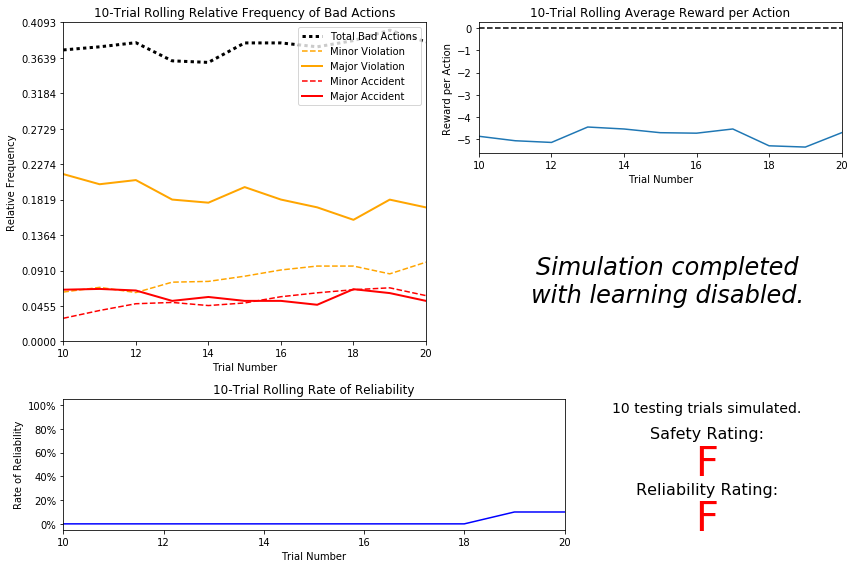

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

From looking at the Relative Frequency of Bad Actions, it is clear that the car is learning nothing, which is consistent with the fact that when we set `self.learning` to `False`, we are taking completely random actions. The number of infringements of each type is relatively constant through the various trial runs, except for minor stochastic fluctuations in the number of infringements of the various types. By simply driving completely erratically, we see that it is relatively easy to make a major violation: about twice as likely as a minor violation. However, the chance that such a violation actually causes an accident is roughly equal for the two types; this is simply equal to the probability of colliding with other vehicles when driving completely randomly. The probability of doing anything wrong is approximately 40%.

From the top-right graph we can additionally see that the average reward for our actions is also constant; in other words, we are not performing actions which are based on a rewards system, and so our completely random actions, on average, do not improve (or get worse) in successive trial runs. Moreover, this reward is always negative, approximately -5. This is presumably due to a nagative reward being associated with each time step where we haven't yet reached our destination. It could also be that, even though we perform good actions more frequently than bad actions, the reward associated to a good action is less than that associated to a (weighted average) bad one, and hence we get an expected reward of about -5.

Our reliability, i.e. our ability to actually arrive at our destination, is 0% for most runs, except for a couple in which we completely randomly happened to stumble upon our destination. This makes perfect sense; occasionally it must be possible to arrive at a pre-designated spot through Brownian motion.

The smartcab is most definitely highly unsafe and high unreliable; it has no ability to make decisions based on its environment or its history, is very unlikely to get you to your destination, and will often cause an accident along the way.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

For efficiency, the most important thing is which direction we need to travel in order to get to the next waypoint -- which direction are we aiming towards to get to our destination in the shortest amount of time?

For safety, on the other hand, it's more relevant to know what the situation looks like in the current crossing, i.e. the input data -- where are all the other cars around me driving toward? This will ensure that we can take an action that does not put us on a collision path with another vehicle.

The deadline is not relevant if we are not willing to compromise on safety; a close deadline may incentivize us to prioritize efficiency over safety, e.g. by driving through a red light, or causing a minor accident, but in general this is not something we want to learn.

Strictly speaking, the input of what the car to the right is doing is not relevant due to the US code and the rules on this grid; however, it seems much more prudent for learning a general driving practice to also payattention to cars on ones right.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

 - There are **three** waypoint directions relative to our heading that we may end up with: Forward, Left, Right. Backward has been omitted since it is automatically seen as a Left or a Right.
 - There are **two** configurations the lights could be in: left-right or up-down (which appear as "green" or "red" depending on the car's position)
 - There are **four** configurations each non-smartcab car could be in, for each of the three positions on the grid (left, right, oncoming): the other car could be directed Forward, Left or Right, or there could be no car at all.

Hence, the total number of possible configurations we could find ourselves in is 3\*2\*4\*4\*4 = **384**. Here I've chosen to ignore the countdown timer, which I've argued shouldn't influence our next decision.

Each simulation run goes through approximately 20 steps or so before the time runs out or we reach our destination. Hence, running 20 simulation-trials should let us cover each state about once. This is clearly not enough to learn, but by increasing the number of trial runs by a factor of 10, this would already be a sizable amount of data with which we can test. This is definitely feasible; the simulations run very quickly.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

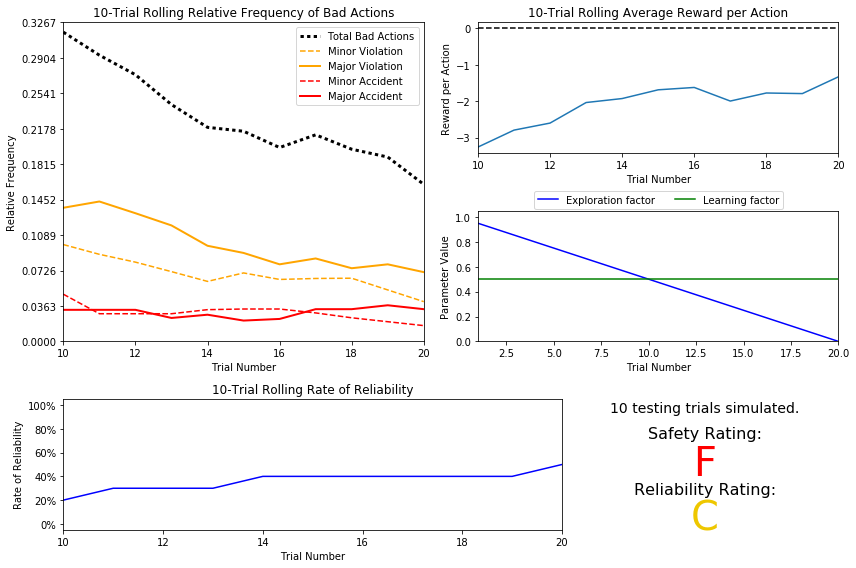

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

From the graphs above, it is immediately clear that the smartcab is now correctly beginning to learn how to drive effeciently while following the rules, as opposed to the situation in Question 3.

The total number of bad actions decreases as the cab learns the negative rewards associated to bad actions; however, that decrease is nearly entirely in an improvement on following the rules of the road and not in decreasing the number of accidents, which remain similar to those levels seen in Question 3. Said differently, it doesn't see following traffic rules as a means to not crash, it sees following rules as an end in itself. The sharpest learning decrease happens for major violations (which do not lead to accidents), while other types of violations and accidents do not change in a meaningful way in the short 20 runs. It is then unsurprising that our safety rating has not changed.

Opening the `sim_default-learning.txt` file, I immediately notice that most entries for most states are equal to zero. Moreover, only 168 out of the possible 384 states appear in the text file. In other words, the smartcab has barely begun learning what to perform in all situations, for the short 20-trial run we did. It is hence not very surprising that the number of accidents has not decreased; mostly the car still doesn't know what to do, because most situations are still new to the car.

Its ability to improve on its rewards-per-action is clear; by decreasing the numnber of major violations, it also avoids getting very negative rewards. However, the average reward is still below zero, suggesting that there is still a lot more learning to be done before the car can be considered safe and efficient.

The rate of reliability does increase: the smartcab is learning that it is a good idea to drive toward the waypoint, which will eventually get the car to its destination. This is even reflected in an improved rating, from F to C.

Given the information above, I recommend a large increase in the number of trial runs, i.e. much more than 20. The $\epsilon$ exploration factor decreases linearly as requested; there might be other strategies that are more condusive to good learning.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

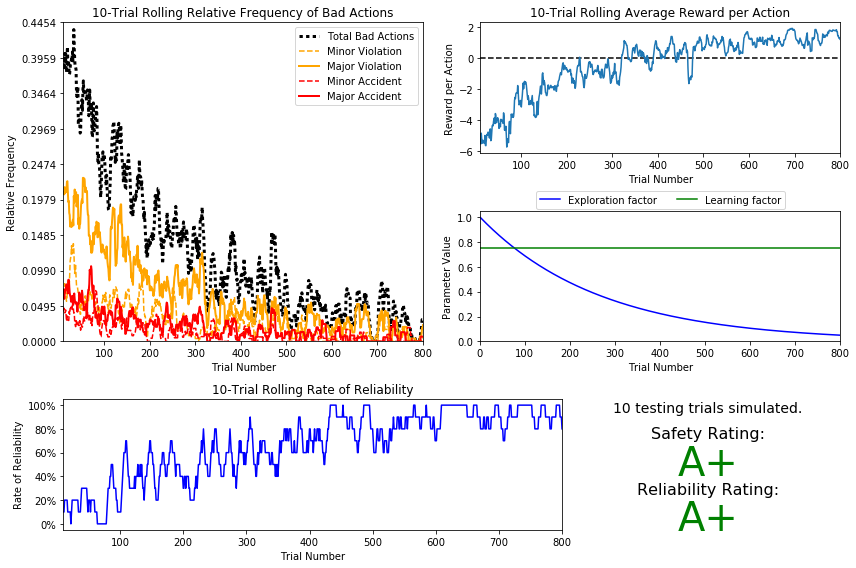

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_powerlaw.csv')

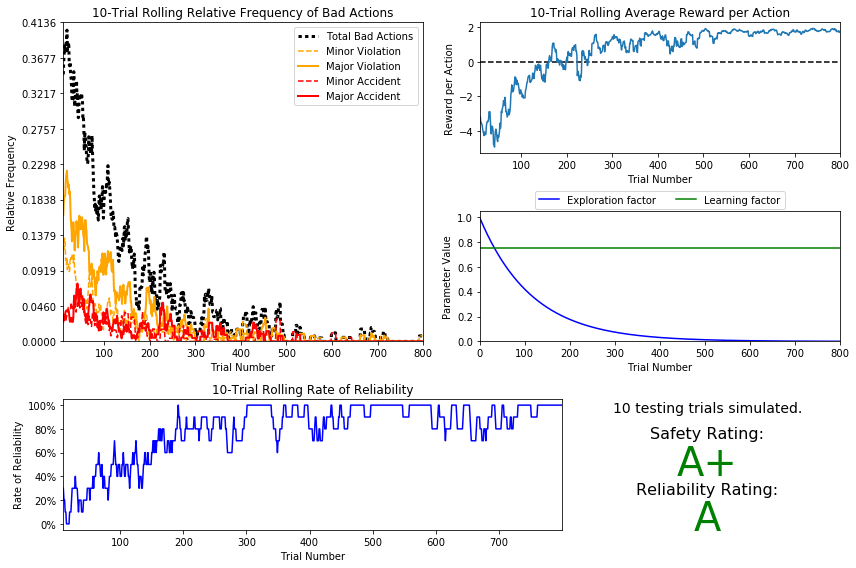

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_exponential.csv')

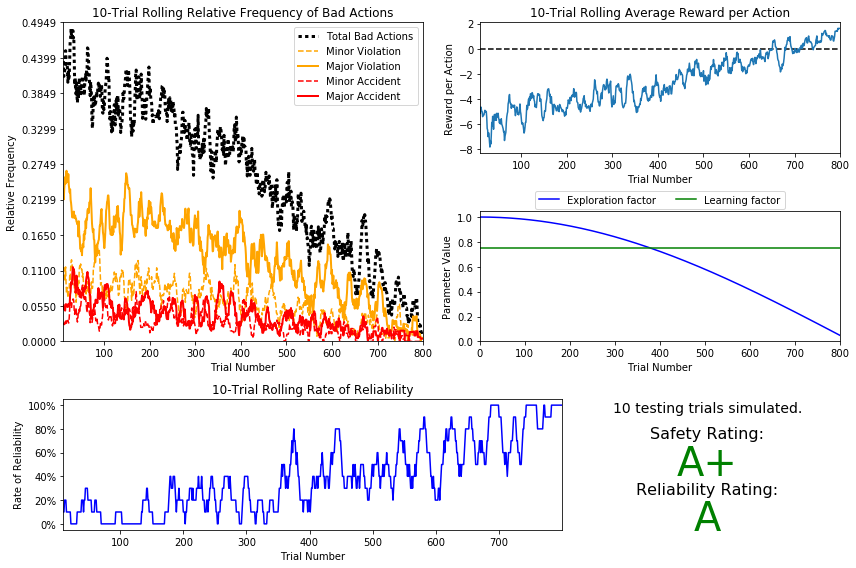

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_cosine.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

The plots above show three different scenarios: a power-law decay rate $\epsilon = a^t$, an exponential decay rate $\epsilon = e^{-a t}$, and a cosine decay $\epsilon = cos(a t)$. All of them have been chosen with a learning rate of $\alpha = 0.75$; this choice comes from trial and error: a smaller learning rate simply gave worse results. For the power-law and the cosine, the $\epsilon$ tolerance rate was set to 0.05, whereas for the exponential it was set to 0.001. Since setting it completely to zero is effectively like driving on the test runs, it's more useful to stop our trials before $\epsilon$ is too close to zero; this is how the 0.05 value was chosen. For the exponenital decay, however, in order to have the same number of trial runs I chose a lower tolerance level: this ensures that the exponential decay and the power-law look qualitatively different.

*Note: As can be seen in the python file agent.py, I actually tried all the strategies for decaying epsilon suggested above. The inverse-quadratic decay gave poor results and was omitted.*

In all the cases above I tuned the parameters such that 800 trial runs would be completed.

Heuristically, a steep decay for $\epsilon$ equates to a smaller amount of exploration and a larger amount of tuning the exact values of the highest Q-values, i.e. of exploitation. The power-law and the exponential decay are examples of this. Conversely, a slow decay focuses much more on exploration of the possible alternatives, but ultimately has very little time to tune the Q-values of the highest-performing actions to their correct values. The cosine decay is an example of this. As can be seen from the output of the code cell below, 800 trial runs encounter about 375 scenarios out of the theoretically possible 384. The scenarios that are not encountered involve very many cars at the same crossing and occur rarely. In fact, decreasing the number of trial runs to 300 only lowers the number of encountered scenarios to about 350. This means that we have explored all of the frequently occurring scenarios at crossings (at least in examples where there are 100 cars on the grid). The cell also shows very clearly that the cosine decay has explored the most, followed by the power-law decay, followed by the exponential decay (which is indeed the steepest decay).

From studying the ratings above I would put my faith the most in the powerlaw-decay learning, since in the final runs we see that it performs very well in terms of safety, as well as reliability. It has clearly mastered a style of driving that gives the car a reward of +2 per action, which may occasionally be suboptimal but is nonetheless safe and gets you to your destination. Since it has spent more time exploring than the exponential decay, it is able to identify unsafe driving practices and avoids them. The exponenital decay, on the other hand, spends too much time exploiting suboptimal driving and too little time exploring; therefore, when put to the test, it may continue to occasionally produce accidents. The cosine decay spends too much time exploring to properly evaluate the Q-values of the optimal routes.

In all three cases the improvements to the scenario in question 6 are undoubtedly very large. Most importantly, our strategy for decaying the exploration rate $\epsilon$ using a powerlaw focuses more on exploitation than exploration compared to the linear case, and has wasted less time on unfruitful actions (and of course I've dramatically increased the number of trial runs!).

*Note: I also tried a completely different option for choosing action in each state. The strategy was to, in each state, first try all choices that had never been tried before to get an idea of how good or bad they were. This step can be seen as "maximal exploration". After that, I assign a probability distribution to the Q-values based on their values. Then we sample an action from this probability distribution. Hence, higher Q-values get sampled more frequently and will get explored more. Unfortunately, this approach ends up seeing each individual state much too seldom to be useful, so the sampling at each state is not representative of the probability distribution, and in the end this strategy ends up focusing too much on exploration rather than exploitations. When tested, it performs extremely poorly and I have removed the code for this strategy from the file agent.py.*

The safety and reliability ratings are not very good however (although the scores I got are very good). We are getting a score of A+ in a car which, if it were real, I would never get in to -- the testing only occurs ten times, so the fact that we did not have an accident in ten driving sessions is hardly comforting and worthy of an A+. I would only want to enter a car whose probability of crashing is infinitesimal. Therefore, if this were to be deployed in a realistic scenario, I would probably like to increase the number of training runs by a huge factor, and also demand a much longer set of testing runs.

In [7]:
import itertools

def get_numstates_percentexplored(filepath):
    thefile  = open(filepath, "r")
    allines = thefile.readlines()
    # Select the lines containig all the encountered states
    allstates = allines[4::6]
    # Now clean up the strings and split up the comma-separated elements
    allstates = np.array([lin[1:-2].split(",") for lin in allstates])
    # Now find all possible states
    allpossiblestates = list(itertools.product(np.unique(allstates[:,0]), 
                                           np.unique(allstates[:,1]), 
                                           np.unique(allstates[:,2]), 
                                           np.unique(allstates[:,3]), 
                                           np.unique(allstates[:,4])))
    # Turn the states we encountered into tuples ("first value", "second value", ...)
    allstates = [tuple(state) for state in allstates]
    
    # Now select those rows have have Q-values in them
    allrownums = range(len(allines))
    allQvalues = np.array(allines)[np.sort(allrownums[5::6] + allrownums[6::6] + allrownums[7::6] + allrownums[8::6])]
    # Now compute the percentage of the Q-values that are equal to zero
    percent_unassigned = np.round(np.mean([point[-5:-1] == "0.00" for point in allQvalues]), decimals=3)*100
    thefile.close()
    
    return (allstates, percent_unassigned)

print "========================================================="
print "RUNS USING POWER-LAW DECAY\n"
(allstates, percent_unassigned) = get_numstates_percentexplored("logs/sim_improved-learning_powerlaw.txt")
print "We have encountered in total %d out of a possible 384" %len(allstates)
print "%.1f %% of moves in the encountered states went unexplored" %percent_unassigned
print "========================================================="
print "RUNS USING EXPONENTIAL DECAY\n"
(allstates, percent_unassigned) = get_numstates_percentexplored("logs/sim_improved-learning_exponential.txt")
print "We have encountered in total %d out of a possible 384" %len(allstates)
print "%.1f %% of moves in the encountered states went unexplored" %percent_unassigned
print "========================================================="
print "RUNS USING COSINE DECAY\n"
(allstates, percent_unassigned) = get_numstates_percentexplored("logs/sim_improved-learning_cosine.txt")
print "We have encountered in total %d out of a possible 384" %len(allstates)
print "%.1f %% of moves in the encountered states went unexplored" %percent_unassigned

RUNS USING POWER-LAW DECAY

We have encountered in total 373 out of a possible 384
26.6 % of moves in the encountered states went unexplored
RUNS USING EXPONENTIAL DECAY

We have encountered in total 376 out of a possible 384
36.4 % of moves in the encountered states went unexplored
RUNS USING COSINE DECAY

We have encountered in total 377 out of a possible 384
16.5 % of moves in the encountered states went unexplored


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

One of the entries in the text file is:

```('forward', 'red', None, 'left', None)
 -- forward : -9.54
 -- right : 0.72
 -- None : 1.34
 -- left : -9.19```
 
Here we see that we want to cross the road and are at a red light, with a car on our right going left. If we drive forward or turn left we will crash. This is indeed reflected in the large negative Q-value of those choices. We are allowed to turn right since this is legal in the USA, as long as we yield to all other traffic. In the situation at hand there is no one to yield to, so turning right is allowed, but not condusive to getting us much closer to our waypoint straight ahead. Hence, we get a small positive value for this action. The best action is to not move and wait for the light to turn green, and then proceed with driving straight ahead.

Another entry in the text file is:

```('right', 'red', 'forward', 'right', 'forward')
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.00
 -- left : -30.03```
 
Here we see that we have not trainied sufficienly long to know what the best thing to do is, and our smartcab may randomly go forward through the red light, causing an accident.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

One of the reasons is that the smartcab doesn't know how close it is to its goal. Therefore, it is always "surprised" to reach its destination, and can't give rewards for getting very close to it. 

As for the environmental reason, whether a state is very good by being closer to our goal depends on where the goal is. Therefore, we shouldn't associate a givengrid position with a good or bad reward based on how close it is to the goal, since the goal changes from trial to trial -- what is a good and close position one run may be a very bad and far-away position in another run.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.